First CNN model:

In [51]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

In [3]:
x_train.shape ,y_train.shape


((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Checking for the 7th image in the training dataset

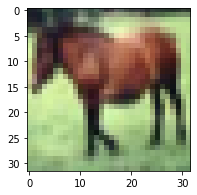

In [6]:
plt.figure(figsize=(14,3))
plt.imshow(x_train[7]);

In [7]:
y_train[7]

array([7], dtype=uint8)

In [8]:
#reshaping y into an 1D array
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
classes[y_train[7]]

'horse'

Plotting some images with their labels

In [10]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

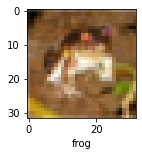

In [11]:
plot_sample(x_train,y_train,0)

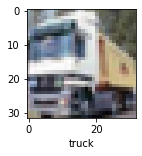

In [12]:
plot_sample(x_train,y_train,1)

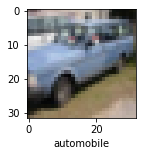

In [16]:
plot_sample(x_train,y_train,77)

Normalize training Data

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Models:

In [42]:
#ANN MODEL 

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),  
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(x_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8230 - accuracy: 0.3456 - val_loss: 1.6771 - val_accuracy: 0.4062
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6264 - accuracy: 0.4229 - val_loss: 1.6268 - val_accuracy: 0.4187
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5429 - accuracy: 0.4534 - val_loss: 1.6221 - val_accuracy: 0.4230
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4793 - accuracy: 0.4784 - val_loss: 1.5331 - val_accuracy: 0.4586
Epoch 5/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.4236 - accuracy: 0.4960 - val_loss: 1.4784 - val_accuracy: 0.4724
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3782 - accuracy: 0.5142 - val_loss: 1.4928 - val_accuracy: 0.4673
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3340 - accuracy: 0.5276 - val_loss: 1.4740 - val_accura

In [43]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3400 - accuracy: 0.5225


[1.3399912118911743, 0.5224999785423279]

After 10 epochs, ANN accuracy is 52% only. Not good result.

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.70      0.57      1000
           1       0.67      0.62      0.65      1000
           2       0.38      0.44      0.41      1000
           3       0.36      0.34      0.35      1000
           4       0.53      0.34      0.42      1000
           5       0.45      0.41      0.43      1000
           6       0.50      0.65      0.57      1000
           7       0.68      0.49      0.57      1000
           8       0.65      0.66      0.65      1000
           9       0.60      0.56      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [49]:
#cnn model:
cnn= models.Sequential([
    layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(1000,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4188 - accuracy: 0.4896 - val_loss: 1.1429 - val_accuracy: 0.6012
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0339 - accuracy: 0.6342 - val_loss: 1.0006 - val_accuracy: 0.6507
Epoch 3/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.8493 - accuracy: 0.7042 - val_loss: 0.9011 - val_accuracy: 0.6883
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6842 - accuracy: 0.7605 - val_loss: 0.8676 - val_accuracy: 0.7045
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5411 - accuracy: 0.8111 - val_loss: 0.8871 - val_accuracy: 0.7108
Epoch 6/10
1250/1250 [==============================] - 11s 8ms/step - loss: 0.4207 - accuracy: 0.8534 - val_loss: 0.9131 - val_accuracy: 0.7146
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.3080 - accuracy: 0.8916 - val_loss: 1.0154 - val_ac

In [50]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.3156 - accuracy: 0.7072


[1.3155995607376099, 0.7071999907493591]

After 10 epochs, CNN accuracy is 71% only. Massive Improvement.

In [52]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.87      0.80      0.83      1000
           2       0.61      0.59      0.60      1000
           3       0.54      0.47      0.50      1000
           4       0.66      0.63      0.64      1000
           5       0.58      0.61      0.59      1000
           6       0.69      0.86      0.77      1000
           7       0.80      0.73      0.76      1000
           8       0.79      0.84      0.81      1000
           9       0.77      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [54]:
y_test = y_test.reshape(-1,)

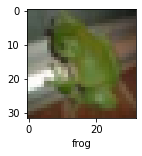

In [55]:
plot_sample(x_test, y_test,7)

In [56]:
classes[y_pred_classes[7]]

'frog'

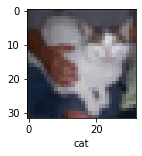

In [61]:
plot_sample(x_test, y_test,77)

In [60]:
classes[y_pred_classes[77]]

'cat'